# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [52]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,28,161.0,154.0,10.0,2505.609457
1,Steinfurt,0,NaN,74.0,4.0,52,41.0,41.0,1.0,2714.197904
2,Magdeburg,0,NaN,83.0,28.0,29,188.0,187.0,6.0,2245.828787
3,Leipzig,0,NaN,61.0,28.0,13,597.0,594.0,21.0,2163.784785
4,Tamm,0,NaN,74.0,4.0,40,336.0,334.0,10.0,2338.611264


In [53]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

First of all, we are going to focus just to the extracted variables, since there are more in the original file, but we are going to work just with the extracted ones.

The City variable is the more special one, sicne it uses the String format, or list of characters, buit it is stored as Object. This is because Pandas recognise a Datatype shose all instances have the same number of bytes, 8 bytes for int64 and float64 for example, but in the case of the String each one has a different size, so each one needs a different number of bytes, and since all the strings of the dataset are not of the same size,Pandas acnnot recognize that as a Srtring, and says that's an Object, which will not help us to use that column, since an Object cannot necessarily be a String and hecne we could not make operations with them. In the othere hand, Revenue and the Mobile Potential are floats and the rest are integers, although all of them except from Customer Flag and CNT_EMPLOYEE (which correctly are stored as integers) are stored as floats with no decimals in the data extraction.

The Sector Variable has some Nulls, although in relation to the total number of instances it is practically negligible, and the same happens with the legal_form_code, which has even less Nulls. Moreover, CNT_CB_DENSITY, CNT_CB_MOB_DENSITY and CNT_CB_FN_DENSITY have multiple Nuls, while City, Customer_flag, CNT_EMPLOYEE and Mobile_potential have all no Nulls.

Finally we have to say that the size of the complete dataset is 13335 entries, and there originally are 10 variables taken into account.

Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [54]:
market_dt = market_dt.dropna()
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,28,161.0,154.0,10.0,2505.609457
5,Düsseldorf,0,8500000.0,59.0,14.0,27,869.0,857.0,59.0,3103.670976
6,Halle,0,2100000.0,73.0,20.0,37,209.0,206.0,9.0,2108.833841
8,Stuttgart,0,630000.0,56.0,14.0,13,749.0,727.0,51.0,2381.708430
9,Porta Westfalica,0,149400000.0,43.0,22.0,48,110.0,107.0,4.0,2772.726870


Your output should look like this:

In [55]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


**As we can see in the table we have equaled the size of every column when we have removed NaN values. The initial dataset had a size of 13335 entries and now  it has a size of 6987. **

In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

In [56]:
customer_dt = market_dt
noncustomer_dt = market_dt

customer_dt = customer_dt.drop(customer_dt[customer_dt.Customer_Flag == 0].index) # Extracting non-customers (Customer_Flag == 0)
noncustomer_dt = noncustomer_dt.drop(noncustomer_dt[noncustomer_dt.Customer_Flag == 1].index) # Extracting customers (Customer_Flag == 1)

print(customer_dt.info())
print(noncustomer_dt.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1111 non-null   object 
 1   Customer_Flag       1111 non-null   int64  
 2   Revenue             1111 non-null   float64
 3   Sector              1111 non-null   float64
 4   Legal_Form_Code     1111 non-null   float64
 5   CNT_EMPLOYEE        1111 non-null   int64  
 6   CNT_CB_DENSITY      1111 non-null   float64
 7   CNT_CB_MOB_DENSITY  1111 non-null   float64
 8   CNT_CB_FN_DENSITY   1111 non-null   float64
 9   Mobile_potential    1111 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 95.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5876 entries, 0 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                5


                                               CUSTOMERS BOXPLOTS:



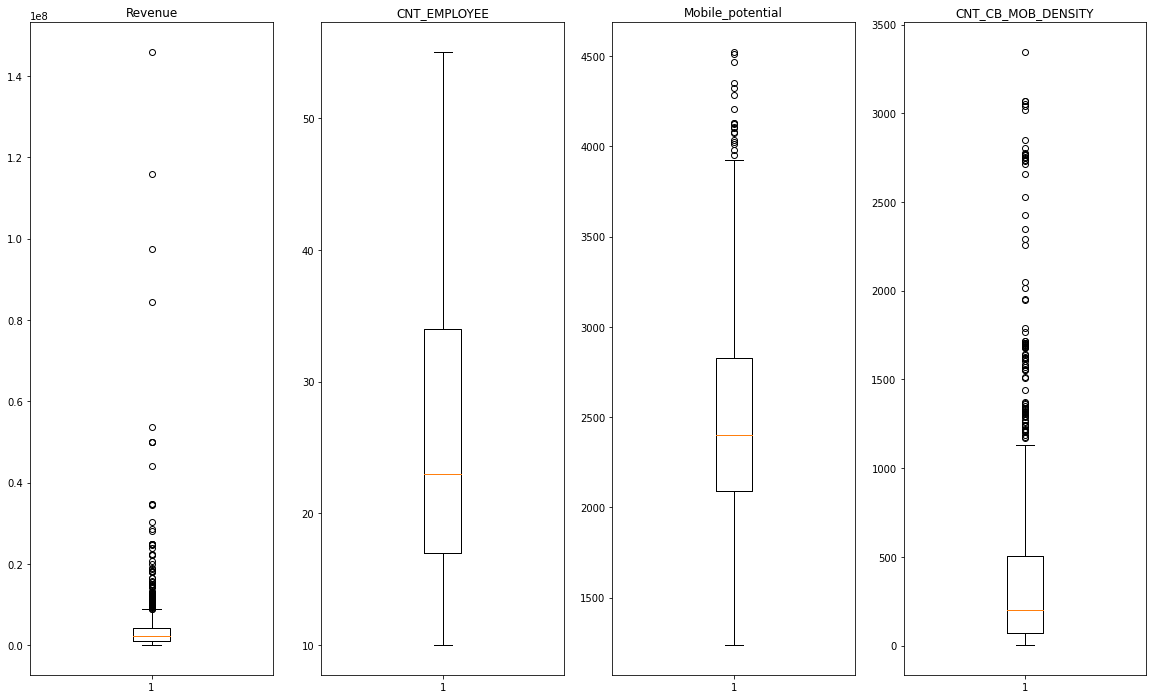


                                            NONCUSTOMERS BOXPLOTS:



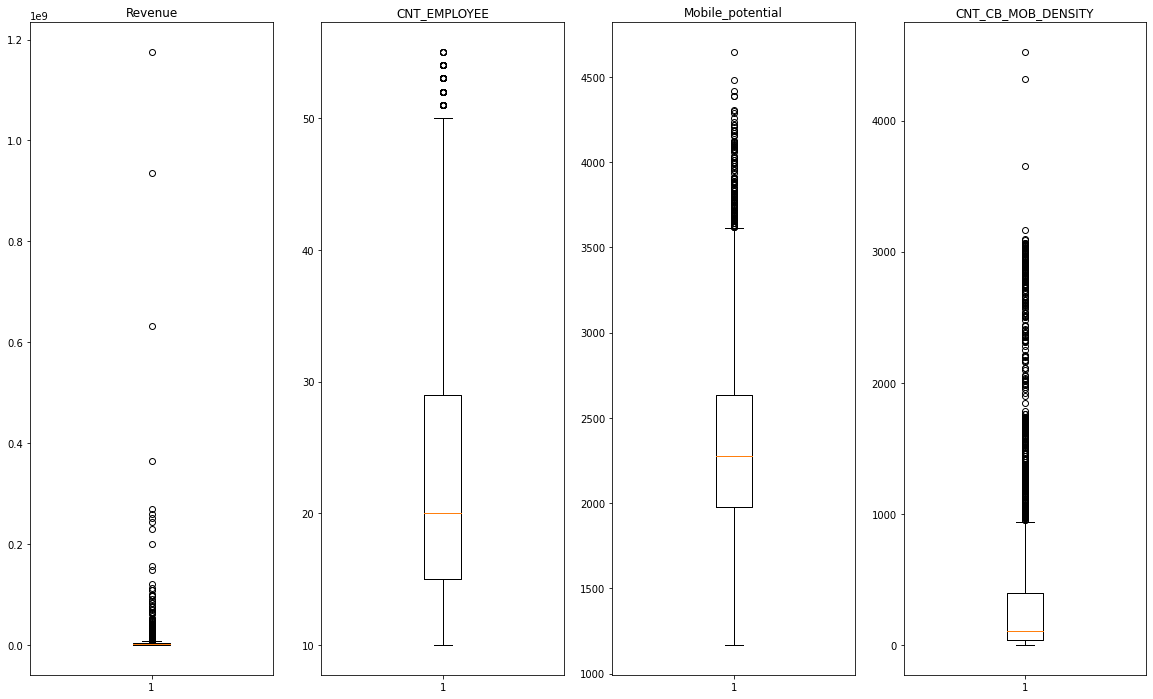

In [57]:
print("\n                                               CUSTOMERS BOXPLOTS:\n")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 12))
ax1.boxplot(customer_dt['Revenue'])
ax1.set_title("Revenue")
ax2.boxplot(customer_dt['CNT_EMPLOYEE'])
ax2.set_title("CNT_EMPLOYEE")
ax3.boxplot(customer_dt['Mobile_potential'])
ax3.set_title("Mobile_potential")
ax4.boxplot(customer_dt['CNT_CB_MOB_DENSITY'])
ax4.set_title("CNT_CB_MOB_DENSITY")
pyplot.show()

print("\n                                            NONCUSTOMERS BOXPLOTS:\n")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 12))
ax1.boxplot(noncustomer_dt['Revenue'])
ax1.set_title("Revenue")
ax2.boxplot(noncustomer_dt['CNT_EMPLOYEE'])
ax2.set_title("CNT_EMPLOYEE")
ax3.boxplot(noncustomer_dt['Mobile_potential'])
ax3.set_title("Mobile_potential")
ax4.boxplot(noncustomer_dt['CNT_CB_MOB_DENSITY'])
ax4.set_title("CNT_CB_MOB_DENSITY")
pyplot.show()

As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

In [58]:
#We compute the number of outliers for both Noncustomers and Customers of the Revenue value
nc_outliers = noncustomer_dt[noncustomer_dt.Revenue > 5*iqr(noncustomer_dt['Revenue'],interpolation = 'midpoint')]
c_outliers = customer_dt[customer_dt.Revenue > 5*iqr(customer_dt['Revenue'],interpolation = 'midpoint')]

print("Revenue Outliers: ")
print("Noncustomers outliers = %s , Customers outliers = %s" % (len(nc_outliers), len(c_outliers)))

Revenue Outliers: 
Noncustomers outliers = 234 , Customers outliers = 35


In [59]:
#Now we're gonna compute the Q1, Q2 and Q3 of Revenue and Mobile potential variables for both customers and noncustomers
# Noncustomer Quantiles 
nc_Q1_rev = np.quantile(noncustomer_dt['Revenue'], 0.25)
nc_Q2_rev = np.median(noncustomer_dt['Revenue'])
nc_Q3_rev = np.quantile(noncustomer_dt['Revenue'], 0.75)

nc_Q1_mp = np.quantile(noncustomer_dt['Mobile_potential'], 0.25)
nc_Q2_mp = np.median(noncustomer_dt['Mobile_potential'])
nc_Q3_mp = np.quantile(noncustomer_dt['Mobile_potential'], 0.75)

#Customer Quantiles
c_Q1_rev = np.quantile(customer_dt['Revenue'], 0.25)
c_Q2_rev = np.median(customer_dt['Revenue'])
c_Q3_rev = np.quantile(customer_dt['Revenue'], 0.75)

c_Q1_mp = np.quantile(customer_dt['Mobile_potential'], 0.25)
c_Q2_mp = np.median(customer_dt['Mobile_potential'])
c_Q3_mp = np.quantile(customer_dt['Mobile_potential'], 0.75)


print("The quantiles for the Revenue variable are:")
print("NonCustomer Q1 = %s , Customer Q1 = %s" % (nc_Q1_rev, c_Q1_rev))
print("NonCustomer Q2 = %s , Customer Q2 = %s" % (nc_Q2_rev, c_Q2_rev))
print("NonCustomer Q3 = %s , Customer Q3 = %s\n" % (nc_Q3_rev, c_Q3_rev))

print("The quantiles for the Mobile potential variable are:")
print("NonCustomer Q1 = %s , Customer Q1 = %s" % (nc_Q1_mp, c_Q1_mp))
print("NonCustomer Q2 = %s , Customer Q2 = %s" % (nc_Q2_mp, c_Q2_mp))
print("NonCustomer Q3 = %s , Customer Q3 = %s" % (nc_Q3_mp, c_Q3_mp))

The quantiles for the Revenue variable are:
NonCustomer Q1 = 902986.0 , Customer Q1 = 1047500.0
NonCustomer Q2 = 1750000.0 , Customer Q2 = 2200000.0
NonCustomer Q3 = 3501123.5 , Customer Q3 = 4195000.0

The quantiles for the Mobile potential variable are:
NonCustomer Q1 = 1975.5165190653966 , Customer Q1 = 2090.6967281537
NonCustomer Q2 = 2277.9727974861535 , Customer Q2 = 2401.464692530968
NonCustomer Q3 = 2631.926166103982 , Customer Q3 = 2826.2351826061667


[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

In [60]:
#We compute the IQR values
IQR_rev = iqr(noncustomer_dt['Revenue'],interpolation = 'midpoint')

IQR_emp = iqr(noncustomer_dt['CNT_EMPLOYEE'],interpolation = 'midpoint')

IQR_mp = iqr(noncustomer_dt['Mobile_potential'],interpolation = 'midpoint')

IQR_den = iqr(noncustomer_dt['CNT_CB_DENSITY'],interpolation = 'midpoint')

IQR_mobden = iqr(noncustomer_dt['CNT_CB_MOB_DENSITY'],interpolation = 'midpoint')

IQR_fnden = iqr(noncustomer_dt['CNT_CB_FN_DENSITY'],interpolation = 'midpoint')

# Dropping every row such any of targeted features is higher than their respective upper bound
noncustomer_dt = noncustomer_dt[(noncustomer_dt.Revenue <= 5*IQR_rev) 
                                           & (noncustomer_dt.CNT_EMPLOYEE <= 5*IQR_emp)
                                           & (noncustomer_dt.Mobile_potential <= 5*IQR_mp)
                                           & (noncustomer_dt.CNT_CB_DENSITY <= 5*IQR_den)
                                           & (noncustomer_dt.CNT_CB_MOB_DENSITY <= 5*IQR_mobden)
                                           & (noncustomer_dt.CNT_CB_FN_DENSITY <= 5*IQR_fnden)]


noncustomer_dt.info()
noncustomer_dt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 5 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                4909 non-null   object 
 1   Customer_Flag       4909 non-null   int64  
 2   Revenue             4909 non-null   float64
 3   Sector              4909 non-null   float64
 4   Legal_Form_Code     4909 non-null   float64
 5   CNT_EMPLOYEE        4909 non-null   int64  
 6   CNT_CB_DENSITY      4909 non-null   float64
 7   CNT_CB_MOB_DENSITY  4909 non-null   float64
 8   CNT_CB_FN_DENSITY   4909 non-null   float64
 9   Mobile_potential    4909 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 421.9+ KB


,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
5,Düsseldorf,0,8500000.0,59.0,14.0,27,869.0,857.0,59.0,3103.670976
6,Halle,0,2100000.0,73.0,20.0,37,209.0,206.0,9.0,2108.833841
8,Stuttgart,0,630000.0,56.0,14.0,13,749.0,727.0,51.0,2381.708430
13,Kerpen,0,8000000.0,47.0,4.0,48,245.0,239.0,15.0,3179.085811
19,Immenreuth,0,5160000.0,74.0,4.0,13,9.0,9.0,0.0,1897.730166


In [61]:
#We compute the IQR values
c_IQR_rev = iqr(customer_dt['Revenue'],interpolation = 'midpoint')

c_IQR_emp = iqr(customer_dt['CNT_EMPLOYEE'],interpolation = 'midpoint')

c_IQR_mp = iqr(customer_dt['Mobile_potential'],interpolation = 'midpoint')

c_IQR_den = iqr(customer_dt['CNT_CB_DENSITY'],interpolation = 'midpoint')

c_IQR_mobden = iqr(customer_dt['CNT_CB_MOB_DENSITY'],interpolation = 'midpoint')

c_IQR_fnden = iqr(customer_dt['CNT_CB_FN_DENSITY'],interpolation = 'midpoint')

# Dropping every row such any of targeted features is higher than their respective upper bound
customer_dt = customer_dt[(customer_dt.Revenue <= 5*c_IQR_rev) 
                                           & (customer_dt.CNT_EMPLOYEE <= 5*c_IQR_emp)
                                           & (customer_dt.Mobile_potential <= 5*c_IQR_mp)
                                           & (customer_dt.CNT_CB_DENSITY <= 5*c_IQR_den)
                                           & (customer_dt.CNT_CB_MOB_DENSITY <= 5*c_IQR_mobden)
                                           & (customer_dt.CNT_CB_FN_DENSITY <= 5*c_IQR_fnden)]


customer_dt.info()
customer_dt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                956 non-null    object 
 1   Customer_Flag       956 non-null    int64  
 2   Revenue             956 non-null    float64
 3   Sector              956 non-null    float64
 4   Legal_Form_Code     956 non-null    float64
 5   CNT_EMPLOYEE        956 non-null    int64  
 6   CNT_CB_DENSITY      956 non-null    float64
 7   CNT_CB_MOB_DENSITY  956 non-null    float64
 8   CNT_CB_FN_DENSITY   956 non-null    float64
 9   Mobile_potential    956 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 82.2+ KB


,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
11548,Haar,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451
11551,Greding,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333
11554,Frankfurt,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693
11565,Benningen,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989



                                               CUSTOMERS BOXPLOTS:



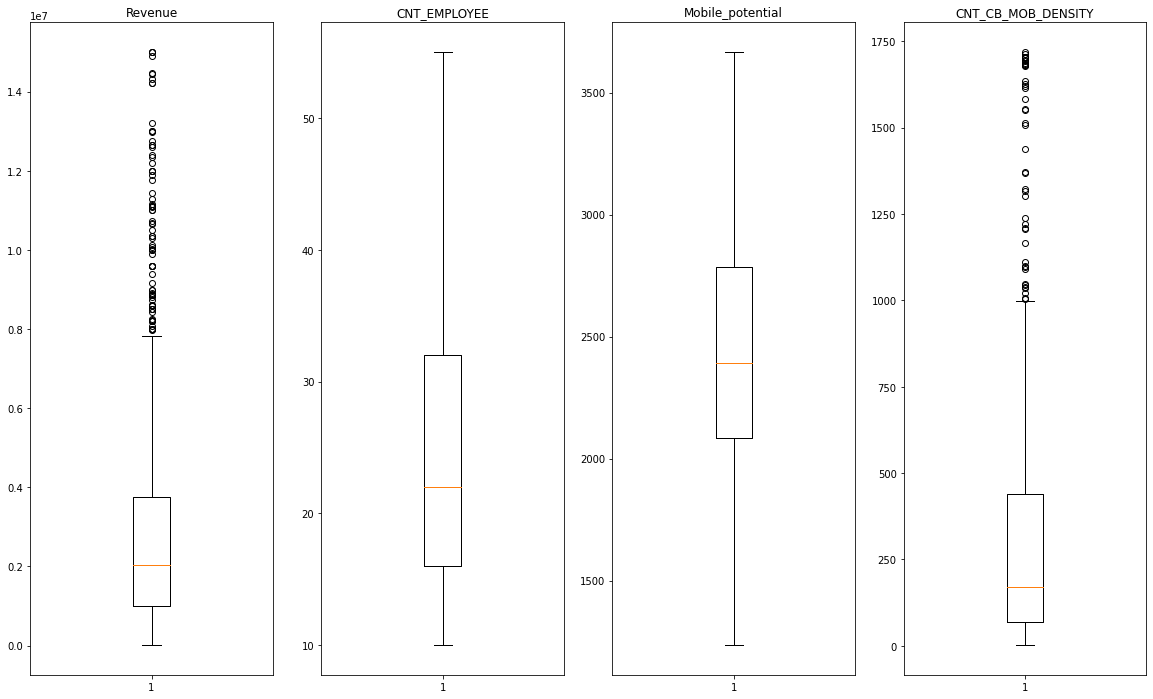


                                            NONCUSTOMERS BOXPLOTS:



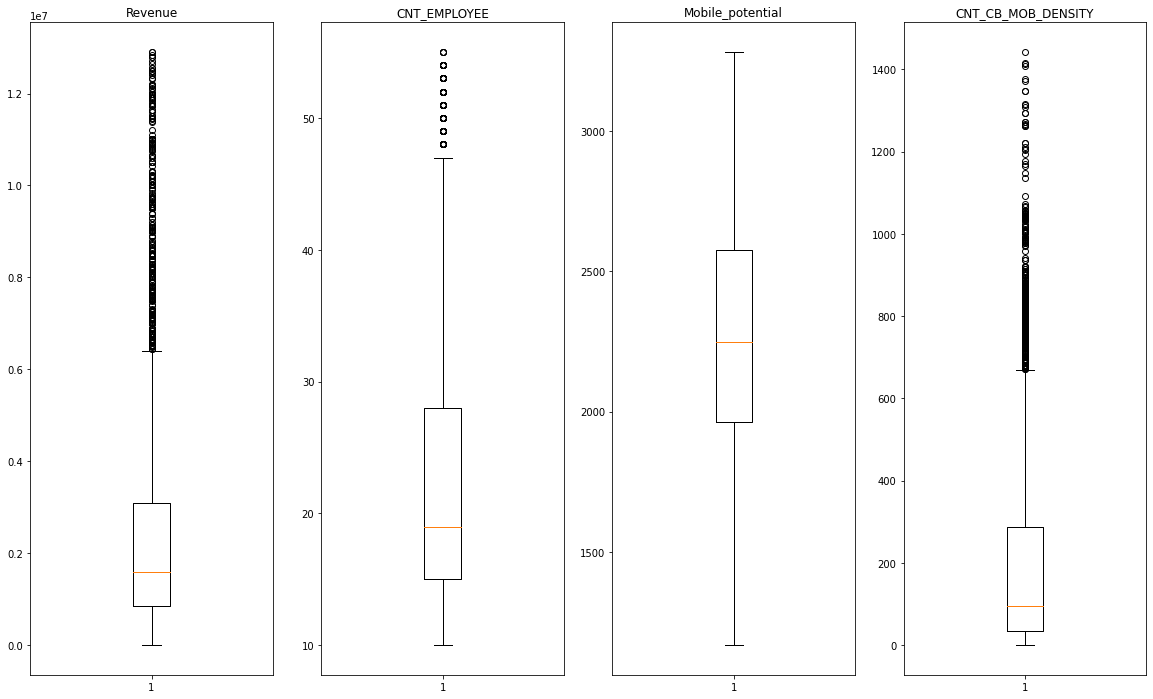

In [62]:
print("\n                                               CUSTOMERS BOXPLOTS:\n")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 12))
ax1.boxplot(customer_dt['Revenue'])
ax1.set_title("Revenue")
ax2.boxplot(customer_dt['CNT_EMPLOYEE'])
ax2.set_title("CNT_EMPLOYEE")
ax3.boxplot(customer_dt['Mobile_potential'])
ax3.set_title("Mobile_potential")
ax4.boxplot(customer_dt['CNT_CB_MOB_DENSITY'])
ax4.set_title("CNT_CB_MOB_DENSITY")
pyplot.show()
print("\n                                            NONCUSTOMERS BOXPLOTS:\n")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 12))
ax1.boxplot(noncustomer_dt['Revenue'])
ax1.set_title("Revenue")
ax2.boxplot(noncustomer_dt['CNT_EMPLOYEE'])
ax2.set_title("CNT_EMPLOYEE")
ax3.boxplot(noncustomer_dt['Mobile_potential'])
ax3.set_title("Mobile_potential")
ax4.boxplot(noncustomer_dt['CNT_CB_MOB_DENSITY'])
ax4.set_title("CNT_CB_MOB_DENSITY")
pyplot.show()

In [63]:
#Now we're gonna compute the Q1, Q2 and Q3 of Revenue and Mobile potential variables for both customers and noncustomers
# Noncustomer Quantiles 
nc_Q1_rev = np.quantile(noncustomer_dt['Revenue'], 0.25)
nc_Q2_rev = np.median(noncustomer_dt['Revenue'])
nc_Q3_rev = np.quantile(noncustomer_dt['Revenue'], 0.75)

nc_Q1_mp = np.quantile(noncustomer_dt['Mobile_potential'], 0.25)
nc_Q2_mp = np.median(noncustomer_dt['Mobile_potential'])
nc_Q3_mp = np.quantile(noncustomer_dt['Mobile_potential'], 0.75)

#Customer Quantiles
c_Q1_rev = np.quantile(customer_dt['Revenue'], 0.25)
c_Q2_rev = np.median(customer_dt['Revenue'])
c_Q3_rev = np.quantile(customer_dt['Revenue'], 0.75)

c_Q1_mp = np.quantile(customer_dt['Mobile_potential'], 0.25)
c_Q2_mp = np.median(customer_dt['Mobile_potential'])
c_Q3_mp = np.quantile(customer_dt['Mobile_potential'], 0.75)


print("The quantiles for the Revenue variable are:")
print("NonCustomer Q1 = %s , Customer Q1 = %s" % (nc_Q1_rev, c_Q1_rev))
print("NonCustomer Q2 = %s , Customer Q2 = %s" % (nc_Q2_rev, c_Q2_rev))
print("NonCustomer Q3 = %s , Customer Q3 = %s\n" % (nc_Q3_rev, c_Q3_rev))

print("The quantiles for the Mobile potential variable are:")
print("NonCustomer Q1 = %s , Customer Q1 = %s" % (nc_Q1_mp, c_Q1_mp))
print("NonCustomer Q2 = %s , Customer Q2 = %s" % (nc_Q2_mp, c_Q2_mp))
print("NonCustomer Q3 = %s , Customer Q3 = %s" % (nc_Q3_mp, c_Q3_mp))

The quantiles for the Revenue variable are:
NonCustomer Q1 = 855000.0 , Customer Q1 = 1000000.0
NonCustomer Q2 = 1600000.0 , Customer Q2 = 2046664.5
NonCustomer Q3 = 3092304.0 , Customer Q3 = 3758283.5

The quantiles for the Mobile potential variable are:
NonCustomer Q1 = 1961.3782027546692 , Customer Q1 = 2084.519611548282
NonCustomer Q2 = 2248.23562939751 , Customer Q2 = 2391.692104145126
NonCustomer Q3 = 2576.204966085905 , Customer Q3 = 2783.8970456303837


**[EX]**
In these boxplots we can clearly see that the number of outliers has been seriously reduced, specially in Revenue and Density boxplots. As is shown in the previous print, the quantils have changed a lot after removing the outliers bringing a more homogeneous data and avoiding extreme values that can complicate creating a model. 

On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [64]:
c_city_ratio = customer_dt["City"].value_counts(normalize=True)
nc_city_ratio = noncustomer_dt["City"].value_counts(normalize=True)

print("City ratio values for customer_dt dataset\n", c_city_ratio)
print("City ratio values for noncustomer_dt dataset\n", nc_city_ratio)


City ratio values for customer_dt dataset
 München         0.024059
Köln            0.020921
Chemnitz        0.017782
Dresden         0.015690
Berlin          0.015690
                  ...   
Hiddenhausen    0.001046
Eppelheim       0.001046
Flörsheim       0.001046
Bad Abbach      0.001046
Wedemark        0.001046
Name: City, Length: 557, dtype: float64
City ratio values for noncustomer_dt dataset
 Köln          0.016093
Bremen        0.009982
Stuttgart     0.009778
Dortmund      0.009371
Dresden       0.009167
                ...   
Salzbergen    0.000204
Bonstetten    0.000204
Neusäß        0.000204
Wolfhagen     0.000204
Solms         0.000204
Name: City, Length: 2126, dtype: float64


As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [65]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,785
11551,Greding,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,723
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,443
11554,Frankfurt,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,592
11565,Benningen,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,205


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

The output should look like this:

In [66]:
final_dataset=customer_dt.append(noncustomer_dt)
final_dataset=final_dataset.drop(columns=['City'])
final_dataset=final_dataset.reindex(columns = ['City_coded', 'Revenue', 'Sector','Legal_Form_Code', 'CNT_EMPLOYEE','CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY','Mobile_potential', 'Customer_Flag'])
final_dataset.rename(columns = {'Customer_Flag':'Target'}, inplace = True)
size = len(final_dataset['City_coded'])

# Exchanging Customer_Flag == 1 for Target == 0 and vice versa
final_dataset.loc[final_dataset.Target == 1, "Target"] = 2 #  Auxiliar change 
final_dataset.loc[final_dataset.Target == 0, "Target"] = 0 # Non-customers do not become targets
final_dataset.loc[final_dataset.Target == 2, "Target"] = 1 # Customers become targets 


final_dataset.reset_index(drop=True, inplace=True) # Reseting index of the dataset
final_dataset.info()
final_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_coded          5865 non-null   int64  
 1   Revenue             5865 non-null   float64
 2   Sector              5865 non-null   float64
 3   Legal_Form_Code     5865 non-null   float64
 4   CNT_EMPLOYEE        5865 non-null   int64  
 5   CNT_CB_DENSITY      5865 non-null   float64
 6   CNT_CB_MOB_DENSITY  5865 non-null   float64
 7   CNT_CB_FN_DENSITY   5865 non-null   float64
 8   Mobile_potential    5865 non-null   float64
 9   Target              5865 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 458.3 KB


,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,785,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,1
1,723,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,1
2,443,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,1
3,592,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,1
4,205,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,1


In [67]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5860,734,6391606.0,60.0,20.0,24,57.0,57.0,0.0,2102.700888,0
5861,1867,305000.0,60.0,4.0,13,9.0,9.0,0.0,1548.889725,0
5862,596,4200000.0,23.0,14.0,54,62.0,62.0,6.0,2388.407248,0
5863,1913,1336495.0,60.0,16.0,20,63.0,61.0,2.0,2657.602909,0
5864,982,4593054.0,64.0,14.0,44,90.0,90.0,5.0,2126.540797,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [68]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.2, random_state=42) 

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [69]:
print("Size X_train: {}%, Size X_test: {}%.\n".format(round(len(X_train['City_coded'])/len(final_dataset['City_coded'])*100,2),round(len(X_test['City_coded'])/len(final_dataset['City_coded'])*100,2)))

Size X_train: 80.0%, Size X_test: 20.0%.



[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

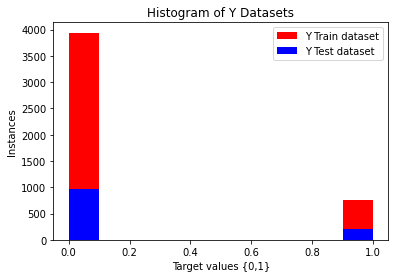

In [70]:
plt.hist(y_train, color = 'red', label='Y Train dataset')
plt.hist(y_test, color = 'blue', label='Y Test dataset')
plt.xlabel("Target values {0,1}")
plt.ylabel("Instances")
plt.legend()
plt.title(label = 'Histogram of Y Datasets')

pyplot.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [71]:
svm = SVC(kernel= 'rbf') # Initialize classifier
svm.fit(X_train, y_train) # Fit the data

y_pred = svm.predict(X_test) # Test the model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred,))
print(confusion_matrix(y_test, y_pred))

y_pred = svm.predict(X_train) # Test the model
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred)) 
print(classification_report(y_train, y_pred,))
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       968
           1       1.00      0.01      0.03       205

    accuracy                           0.83      1173
   macro avg       0.91      0.51      0.47      1173
weighted avg       0.86      0.83      0.75      1173

[[968   0]
 [202   3]]
Accuracy: 0.841
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3941
           1       1.00      0.01      0.02       751

    accuracy                           0.84      4692
   macro avg       0.92      0.50      0.46      4692
weighted avg       0.87      0.84      0.77      4692

[[3941    0]
 [ 745    6]]


**[EX]** The algorithm only classifies correctly the class 0 (Target 0) with a recall of 100%, but this is only because it classifies every instance to class 0.
As we can see above the global accuracy is higher in the training set (the second one). Also both sets have the same recall and the precision of the second set is slightly better. This is beacause of we used the second set to train the model and then it is normal to fit better in the classifier. The recall of both sets of class 0 is 1 which means that the model has correctly classified every element of class 0 to the class 0 instead, the recall of class 1 is nearly to 0, making this model a bad one despite of the high accuracy. For this reason, we can conclude that the precision of the model is not the only important measure, we can say that to estimate the performance of unseen datasets is more important the recall. Also we can see in the confusion matrix that only few instances of class 1 have been correctly classified.

### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [72]:
dtc = DecisionTreeClassifier() # Initialize classifier
dtc.fit(X_train, y_train) # Fit the data

y_pred = dtc.predict(X_test) # Test the model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.758
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       968
           1       0.33      0.37      0.35       205

    accuracy                           0.76      1173
   macro avg       0.59      0.60      0.60      1173
weighted avg       0.77      0.76      0.76      1173

[[814 154]
 [130  75]]


**[EX]** Comparing to the previous model, this one at least classifies both classes instead of only one as the SVM did. We can see less recall to the class 0 but a decent recall for class 1, unlike the 1% of the previous one.  

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

The output of the boxplots should look like this:

The mean and standard deviation of SVM are: mean = 0.759 and standard deviation = 0.003
The mean and standard deviation of Decision Tree are: mean = 0.841 and standard deviation = 0.016


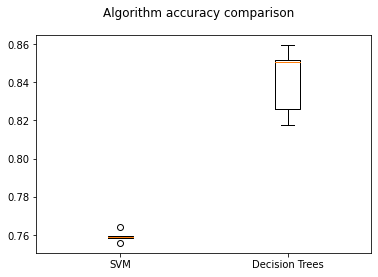

In [73]:
results = []
models = {svm,dtc}
# Cross validation for each model
for model in models:
  results.append(cross_val_score(model, X_train, y_train, cv = KFold(n_splits=5), scoring = 'accuracy'))

# Computing statistics 
mean_svm = np.mean(results[0])
std_svm = np.std(results[0])
mean_dtc = np.mean(results[1])
std_dtc = np.std(results[1])
print("The mean and standard deviation of SVM are: mean = %.3f and standard deviation = %.3f"%(mean_svm,std_svm))
print("The mean and standard deviation of Decision Tree are: mean = %.3f and standard deviation = %.3f"%(mean_dtc,std_dtc))

#boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
names = ['SVM','Decision Trees']
ax.set_xticklabels(names)
pyplot.show()

**[EX]** As we can see the model with higher accuracy mean is SVM but Decision Tree has less standard deviation on accuracy.

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


In [74]:
customer_dt = final_dataset
noncustomer_dt = final_dataset

# Drop rows where Target == 1 that means it is a non-customer and vice versa
customer_dt = customer_dt.drop(customer_dt[customer_dt.Target == 0].index) 
noncustomer_dt = noncustomer_dt.drop(noncustomer_dt[noncustomer_dt.Target == 1].index)

print(customer_dt.info())
print(noncustomer_dt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_coded          956 non-null    int64  
 1   Revenue             956 non-null    float64
 2   Sector              956 non-null    float64
 3   Legal_Form_Code     956 non-null    float64
 4   CNT_EMPLOYEE        956 non-null    int64  
 5   CNT_CB_DENSITY      956 non-null    float64
 6   CNT_CB_MOB_DENSITY  956 non-null    float64
 7   CNT_CB_FN_DENSITY   956 non-null    float64
 8   Mobile_potential    956 non-null    float64
 9   Target              956 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 82.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 956 to 5864
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_coded          4909 non-null   int

Let's undersample the `noncustomer_dt` to balance both datasets:

In [75]:
noncustomer_dt_sample=noncustomer_dt.sample( len(customer_dt))
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 956


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

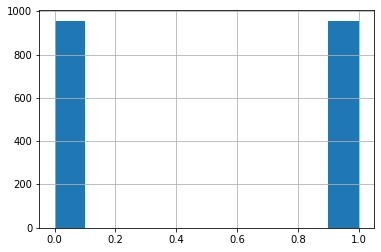

In [76]:
final_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset=final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()
pyplot.show()

**[EX]** As we can see above, customers dataset has 956 entries and noncustomer has 4909 entries due to this, the final dataset is imbalanced. In order to match both datasets we can use the whole customers dataset and only 956 entries of noncustomers dataset (undersample) or repeat entries of customers dataset, but the best option would be obtain more samples if it were posible.

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [77]:

# Create datasets
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.2, random_state=42)  

# Initialize classifier and fit the data
svm = SVC(kernel= 'rbf').fit(X_train, y_train) 

# Test the model and print the results
y_pred = svm.predict(X_test)
print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,))
print(confusion_matrix(y_test, y_pred))

# Initialize classifier and fit the data
dtc = DecisionTreeClassifier().fit(X_train, y_train)

# Test the model and print the results
y_pred = dtc.predict(X_test)
print('Decision Tree Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred,))
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 0.577
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       187
           1       0.60      0.54      0.56       196

    accuracy                           0.58       383
   macro avg       0.58      0.58      0.58       383
weighted avg       0.58      0.58      0.58       383

[[116  71]
 [ 91 105]]
Decision Tree Accuracy: 0.574
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       187
           1       0.59      0.57      0.58       196

    accuracy                           0.57       383
   macro avg       0.57      0.57      0.57       383
weighted avg       0.57      0.57      0.57       383

[[109  78]
 [ 85 111]]


### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [78]:
# Initialize the baseline models
svm = SVC(kernel= 'rbf')
dtc = DecisionTreeClassifier()

# Create the ensemble model
vc_hard = VotingClassifier(estimators=[('svm', svm), ('dtc', dtc)], voting='hard').fit(X_train, y_train)
y_pred_vch = vc_hard.predict(X_test)

print('Voting: %.3f' % accuracy_score(y_test, y_pred_vch))
print(classification_report(y_test, y_pred_vch,))
print(confusion_matrix(y_test, y_pred_vch))

Voting: 0.580
              precision    recall  f1-score   support

           0       0.55      0.83      0.66       187
           1       0.68      0.34      0.45       196

    accuracy                           0.58       383
   macro avg       0.61      0.59      0.56       383
weighted avg       0.61      0.58      0.55       383

[[156  31]
 [130  66]]


### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [79]:
# Create the ensemble model
rfc = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print('Decision Tree Accuracy: %.3f' % accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc,))
print(confusion_matrix(y_test, y_pred_rfc))

Decision Tree Accuracy: 0.627
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       187
           1       0.62      0.70      0.66       196

    accuracy                           0.63       383
   macro avg       0.63      0.62      0.62       383
weighted avg       0.63      0.63      0.62       383

[[102  85]
 [ 58 138]]


[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

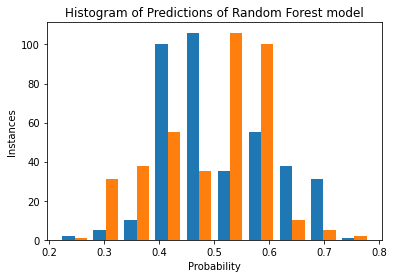

In [80]:
prob = rfc.predict_proba(X_test)
plt.hist(prob)
plt.xlabel("Probability")
plt.ylabel("Instances")
plt.title(label = 'Histogram of Predictions of Random Forest model')
pyplot.show()
# Blue class 0
# Orange class 1

### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [81]:
# Create the ensemble model
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)

print('Decision Tree Accuracy: %.3f' % accuracy_score(y_test, y_pred_gbt))
print(classification_report(y_test, y_pred_gbt,))
print(confusion_matrix(y_test, y_pred_gbt))

Decision Tree Accuracy: 0.627
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       187
           1       0.64      0.63      0.63       196

    accuracy                           0.63       383
   macro avg       0.63      0.63      0.63       383
weighted avg       0.63      0.63      0.63       383

[[116  71]
 [ 72 124]]


[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

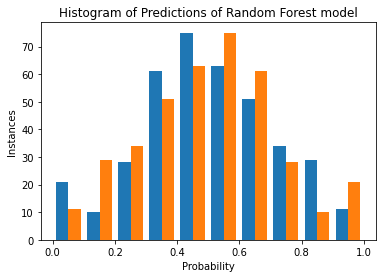

In [82]:
prob = gbt.predict_proba(X_test)
plt.hist(prob)
plt.xlabel("Probability")
plt.ylabel("Instances")
plt.title(label = 'Histogram of Predictions of Random Forest model')
pyplot.show()
# Blue class 0
# Orange class 1

# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




In [83]:
y_pred_grad = gbt.predict_proba(X_test)
cutoff_values = [0.5,0.55,0.6,0.65,0.7,0.75,0.8]

y_pred_gbt_tot = np.concatenate((y_pred_grad[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)),axis=1)

for cutoff in cutoff_values:
  y_pred_grad = gbt.predict_proba(X_test)
  y_pred_change = []

  for i in range (len(y_pred_gbt_tot)):
    if y_pred_grad[i,1]>=cutoff:
      y_pred_change.append(1)
    else:
      y_pred_change.append(0)
  print("\n GTB with a cutoff value of ", cutoff)
  print(classification_report(y_test,y_pred_change))
  print("Conufusion Matrix: \n\n", confusion_matrix(y_test,y_pred_change))


 GTB with a cutoff value of  0.5
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       187
           1       0.64      0.63      0.63       196

    accuracy                           0.63       383
   macro avg       0.63      0.63      0.63       383
weighted avg       0.63      0.63      0.63       383

Conufusion Matrix: 

 [[116  71]
 [ 72 124]]

 GTB with a cutoff value of  0.55
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       187
           1       0.67      0.50      0.57       196

    accuracy                           0.62       383
   macro avg       0.63      0.62      0.61       383
weighted avg       0.63      0.62      0.61       383

Conufusion Matrix: 

 [[138  49]
 [ 98  98]]

 GTB with a cutoff value of  0.6
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       187
           1       0.68      0.41      0.51 

Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [84]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=gbt.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])

[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [85]:
# Sort the features by importance score
features_ordered = sorted(features_importance, key = lambda tup: tup[1], reverse = True)
for i in range(3):
  print("%d.- %s: %.3f"%(i+1,features_ordered[i][0],features_ordered[i][1]))

1.- CNT_CB_MOB_DENSITY: 0.215
2.- Mobile_potential: 0.203
3.- Legal_Form_Code: 0.125


  [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of a **New IoT tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today this New IoT tariff is very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`Number of IoT devices (units)` vs `Number of IoT applications (units)`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `Number of IoT devices (units)` and `Number of IoT applications (units)` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- Is the training dataset balanced? Justiy your answer
- According to the previous plane, which are the customers to be phoned to sell the New IoT tariff?
- Could you estimate the **precision** and **recall** of the classification?

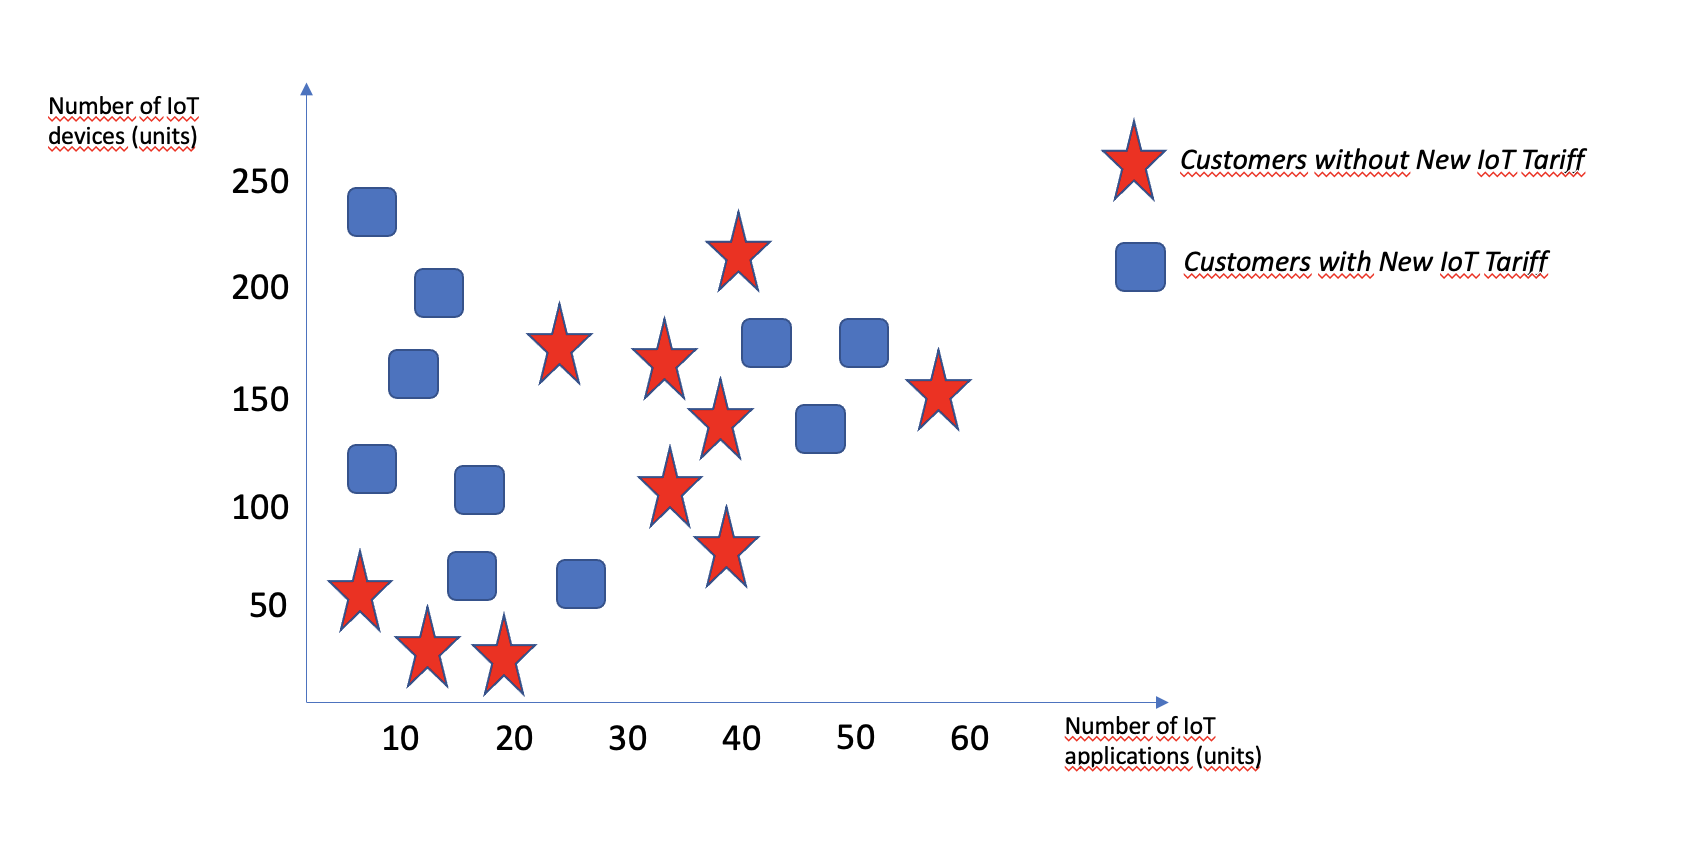

*******